In [1]:
%%html
<style> h1, h2, h3, h4 {font-weight: 500 !important} </style>

In [2]:
# imports

import os
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [3]:
# config

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
%matplotlib inline
plt.style.use('classic')
dataset = Path('../datasets/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

## utils

In [4]:
def get_by_country(country_name, province=False):
    if province:
        df_country = df[df['Country/Region']==country_name]
        series = pd.Series(data=df_country.iloc[:, 4:].values[0], index=pd.to_datetime(df_country.iloc[:, 4:].columns))
    else:
        series = df.groupby('Country/Region').sum().loc[country_name, :][2:]
        series.index = pd.to_datetime(series.index)
    return series

## data exploration

In [5]:
df = pd.read_csv(dataset)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


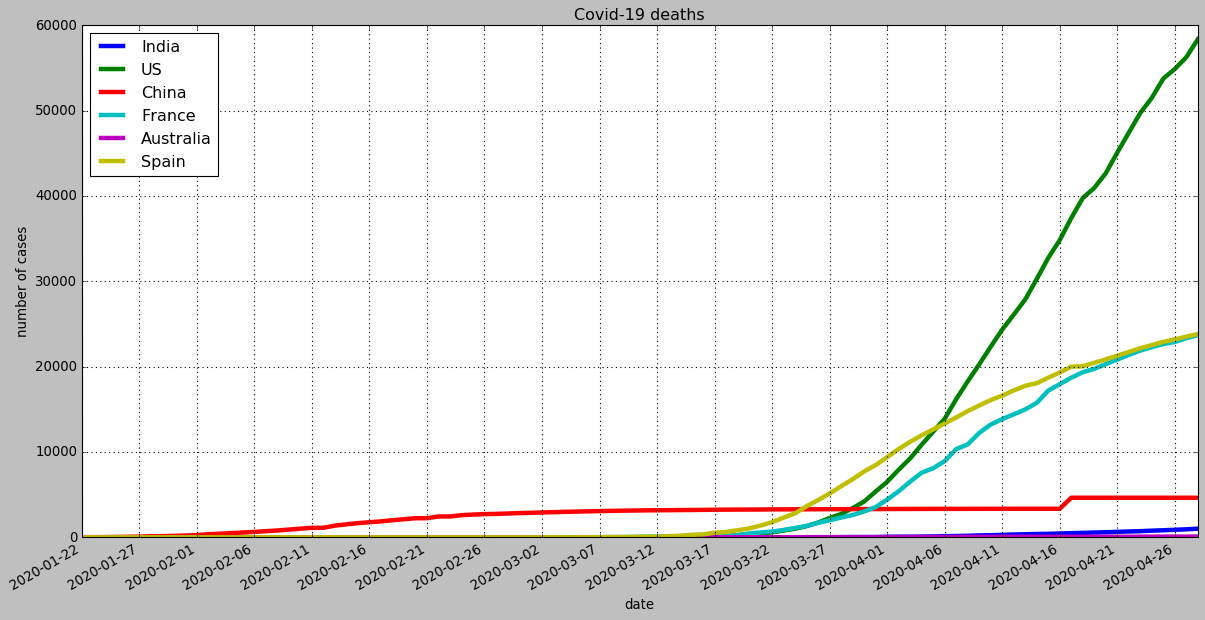

In [6]:
countries = ['India', 'US', 'China', 'France', 'Australia', 'Spain']
plt.figure(figsize=(18, 8))
for country in countries:
    country_series = get_by_country(country)
    plt.plot(country_series.index.strftime('%Y-%m-%d'), country_series.values, lw=4, label=country)
#     plt.plot(country_series2.index.strftime('%Y-%m-%d'), country_series2.values, lw=4, color='yellow', label='India')
plt.xticks(np.arange(0, len(country_series.index), 5), country_series.index[::5].strftime('%Y-%m-%d'), rotation=30, ha='right')
plt.grid(True, linewidth=1)
plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('number of cases')
plt.title(f'Covid-19 deaths')# in {country}', fontdict={'fontsize': 14, 'fontweight': 600})
plt.show()

In [7]:
# series_india.resample(rule='1w').sum().plot.bar()

## Rolling and Expanding

In [8]:
series_india = get_by_country('India')

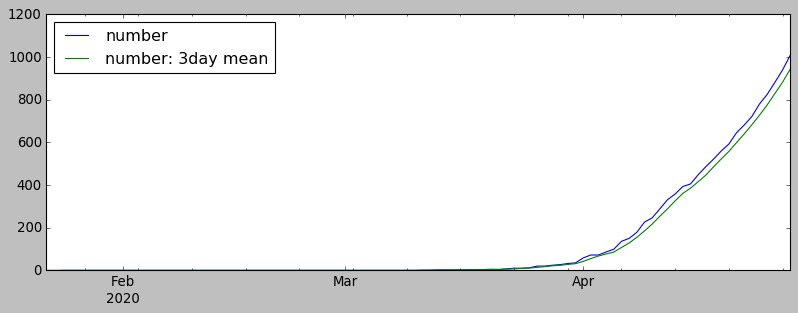

In [9]:
series_india.plot(figsize=(12, 4), label='number')
series_india.rolling(window=3).mean().plot(figsize=(12, 4), label='number: 3day mean')
plt.legend(loc='upper left')

# notice green curve is smooth

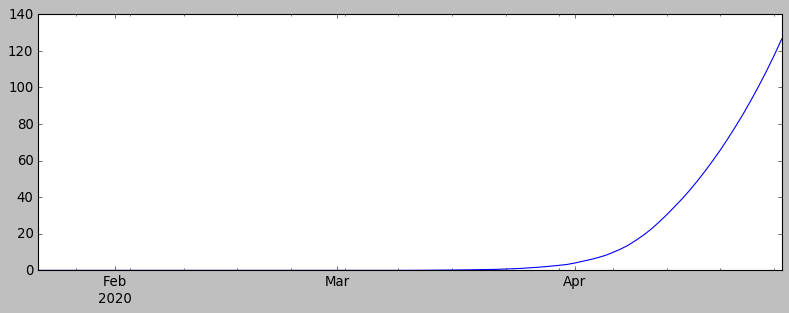

In [10]:
series_india = get_by_country('India')
series_india.expanding().mean().plot(figsize=(12, 4))

# expanding - average over the dates (finally converges to the average overall)

## Time series analysis

In [11]:
# introduction to stats models
from statsmodels.tsa.filters.hp_filter import hpfilter

In [19]:
series_us = get_by_country('US')
deaths_cycle, deaths_trend = hpfilter(series_us, lamb=200)

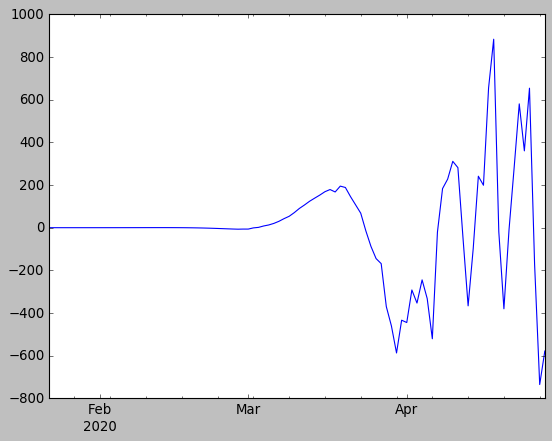

In [20]:
deaths_cycle.plot()